In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last"


In [70]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from requests import get
import seaborn as sns

In [3]:
url = 'https://pandaforecast.com/stock_forecasts/forecast_amzn/for2024/'


In [4]:
soup = BeautifulSoup(requests.get(url).text, 'lxml')
stock_data = soup.find_all("table")
# len(stock_data)
table = stock_data[0]
thead = table.find_all('thead')[0]


In [5]:
d = {}
for header in thead.find_all('th'):
    pass
    column_name = header.text.replace('.','')\
                              .replace('%','')\
                              .replace(',','')\
                              .strip()
    d[column_name] = []
#     d

tbody = table.find_all('tbody')[0]

for row in tbody.find_all('tr'):
    pass
    cells = [ td for td in row.find_all('td')]
    cells = [ td.text for td in cells ]
    for td, column_name in zip(cells, d):
        pass
        d[column_name].append(td.replace(' ','')\
                                 .replace('%', '')
                             )
df = pd.DataFrame(d).set_index('Month')
# df.drop(columns = ['Vol'])
df
        

,Target,Pes,Opt,Vol
Month,,,,
Jan,2667.57,2579.54,2931.66,12.01
Feb,3067.71,2934.26,3233.36,9.25
Mar,2971.07,2654.65,3318.69,20.01
Apr,3122.60,2869.67,3408.32,15.80
May,3361.48,3033.73,3487.53,13.01
Jun,3311.05,3062.73,3579.25,14.43
Jul,2869.03,2692.58,3079.90,12.58
Aug,2791.57,2632.45,3093.05,14.89
Sep,2787.38,2507.25,2921.17,14.17


In [6]:
for column in df.columns:
    pass
    # Convert DataFrame column from string to float
    df[column] = pd.to_numeric(df[column], downcast="float")
df.dtypes
df.head()

,Target,Pes,Opt,Vol
Month,,,,
Jan,2667.570068,2579.540039,2931.659912,12.01
Feb,3067.709961,2934.260010,3233.360107,9.25
Mar,2971.070068,2654.649902,3318.689941,20.01
Apr,3122.600098,2869.669922,3408.320068,15.80
May,3361.479980,3033.729980,3487.530029,13.01


# Matplotlib
---

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# plt.style.use('seaborn-pastel')

In [9]:
dates = df.index

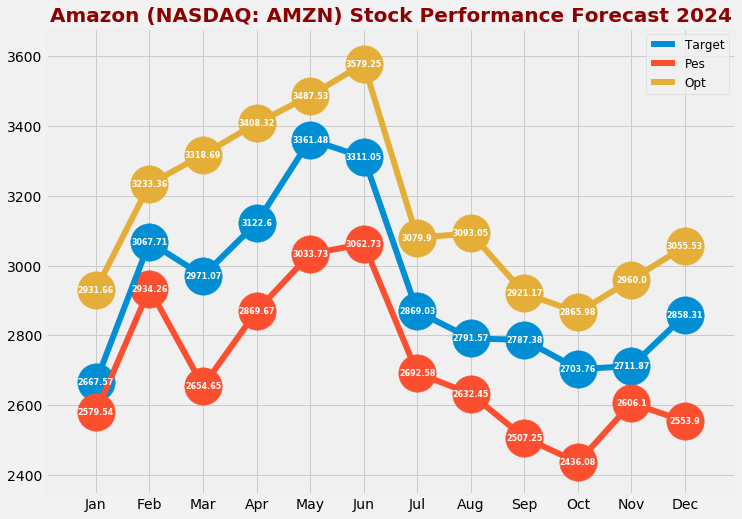

In [10]:
plt.figure(figsize=(11, 8), facecolor='0.95', )
cols = df.drop(columns = ['Vol']).columns

for col in cols:
    pass
    values = df[col]
    plt.scatter(dates,values, s=1400)
    plt.plot(dates, values, linewidth=6)
    plt.legend(df.drop(columns = ['Vol']).columns, fontsize=12,)
    
plt.grid(visible=True)
for i in range(len(df.drop(columns = ['Vol']).reset_index()['Month'])):
    pass
    for col in cols:
        pass
        plt.text(i,df[col][i],df[col][i], 
            verticalalignment='center', horizontalalignment='center',size='small',
             color='w',weight='semibold', fontsize=8)
    
plt.title('Amazon (NASDAQ: AMZN) Stock Performance Forecast 2024', fontsize=20, 
          color='darkred', weight='semibold')
plt.show()


In [78]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


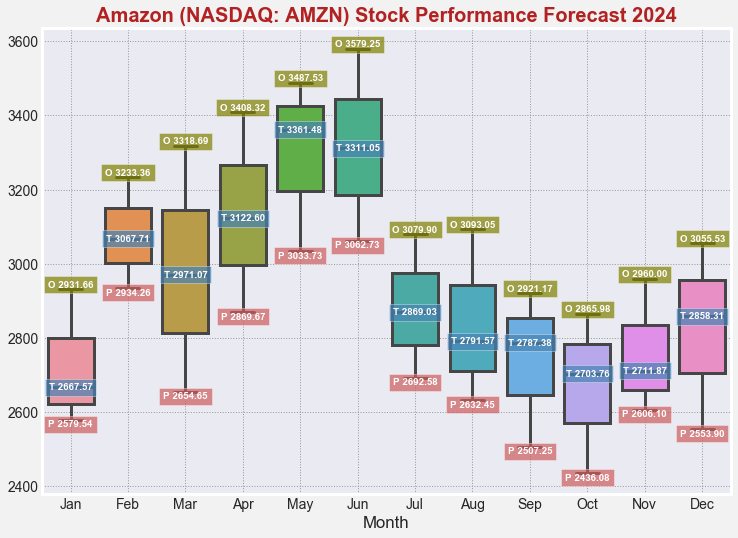

In [80]:
plt.figure(figsize=(11, 8), facecolor='0.95', )
plt.title('Amazon (NASDAQ: AMZN) Stock Performance Forecast 2024', fontsize=20, 
          color='firebrick', weight='semibold')
box_plot = sns.boxplot(data=df.drop(columns = ['Vol']).transpose(), orient="",linewidth=3.0 )
plt.grid(visible=True)
for i in range(len(box_plot.get_xticks())):
    pass
    text_config = [
        ('Target', 'center', 'w', 'steelblue'),
        ('Opt', 'bottom', 'w', 'olive'),
        ('Pes', 'top', 'w', 'indianred'),
    ]
    for (column, va, color, bg) in text_config:
        pass
        box_plot.text(
                  i,df[column][i],str(column[0]+' ' + \
                  "{:0.2f}".format(df[column][i],2)), 
                  verticalalignment=va,
                  horizontalalignment='center',
                  size='x-small',
                  color=color,
                  weight='bold',
                  bbox=dict(facecolor=bg, alpha=0.70)
                 )

In [14]:
df.transpose()


Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Target,2667.570068,3067.709961,2971.070068,3122.600098,3361.479980,3311.050049,2869.030029,2791.570068,2787.379883,2703.760010,2711.870117,2858.310059
Pes,2579.540039,2934.260010,2654.649902,2869.669922,3033.729980,3062.729980,2692.580078,2632.449951,2507.250000,2436.080078,2606.100098,2553.899902
Opt,2931.659912,3233.360107,3318.689941,3408.320068,3487.530029,3579.250000,3079.899902,3093.050049,2921.169922,2865.979980,2960.000000,3055.530029
Vol,12.010000,9.250000,20.010000,15.800000,13.010000,14.430000,12.580000,14.890000,14.170000,15.000000,11.960000,16.420000


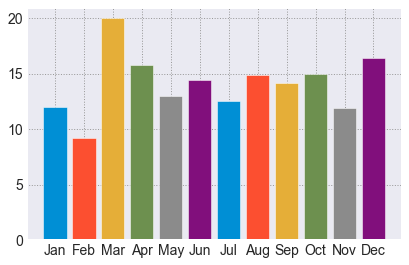

In [15]:
for month in [m for m in df.index]:
    pass
    values = df['Vol'].transpose()[month]
    plt.bar(month,values)
    